# 4d. Calculate isobars

This allows you to calculate H<sub>2</sub>O-CO<sub>2</sub> isobars for a given melt composition and temperature.

## Python set-up
You need to install VolFe once on your machine, if you haven't yet. Then we need to import a few Python packages (including VolFe). 

In [1]:
# Install VolFe on your machine. Don't remove the # from this line!
# pip install VolFe # Remove the first # in this line if you have not installed VolFe on your machine before.

# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import VolFe as vf

## Define inputs

The melt composition and temperature can be given in a dataframe, or read from a csv file.

In this example it is read from a dataframe,which is from Brounce et al. (2014) with the updated Fe<sup>3+</sup>/Fe<sub>T</sub> from Cottrell et al. (2021).

Note the volatile content of the melt is not used in this calculation.

In [3]:
# Define the melt composition, fO2 estimate, and T as a dictionary.
my_analysis = {'Sample':'Sari15-04-33',
           'T_C': 1200., # Temperature in 'C
           'SiO2': 47.89, # wt%
           'TiO2': 0.75, # wt%
           'Al2O3': 16.74, # wt%
           'FeOT': 9.43, # wt%
           'MnO': 0.18, # wt%
           'MgO': 5.92, # wt%
           'CaO': 11.58, # wt%
           'Na2O': 2.14, # wt%
           'K2O': 0.63, # wt%
           'P2O5': 0.17, # wt%
           'Fe3FeT': 0.177,
           'initial_P': 5000.} # bar

# Turn the dictionary into a pandas dataframe, setting the index to 0.
my_analysis = pd.DataFrame(my_analysis, index=[0])

We'll mostly use the default options...

In [4]:
# print default options in VolFe
print(vf.default_models)

                            option
type                              
COH_species     yes_H2_CO_CH4_melt
H2S_m                         True
species X                       Ar
Hspeciation                   none
fO2                       Kress91A
...                            ...
error                          0.1
print status                 False
output csv                    True
setup                        False
high precision               False

[78 rows x 1 columns]


... but the 'COH_species' must be set to 'H2O-CO2 only' because the isobars are calculated assuming the only melt and vapor species are H<sub>2</sub>O and CO<sub>2</sub>O.

In [5]:
# change just the "COH_species" option to "H2O-CO2 only"
my_models = [['COH_species','H2O-CO2 only']]

# turn "my_models" to dataframe with correct column headers and indexes    
my_models = vf.make_df_and_add_model_defaults(my_models)

## Run calculation

The calculation is run as below. The initial and final pressure, as well as the pressure step, must be specified.

In [6]:
# calculate isobars starting at 1000 bars, ending at 4000 bars at 1000 bar intervals
isobars = vf.calc_isobar(my_analysis,models=my_models,initial_P=1000.,final_P=4000.,step_P=1000.)

## Plotting

For plotting, we have to split out the different isobars

In [10]:
# split into each pressure for plotting
isobar1000 = isobars[isobars["P_bar"]==1000.]
isobar2000 = isobars[isobars["P_bar"]==2000.]
isobar3000 = isobars[isobars["P_bar"]==3000.]
isobar4000 = isobars[isobars["P_bar"]==4000.]

And we can plot them

Text(0.5, 0, 'H2O (wt%)')

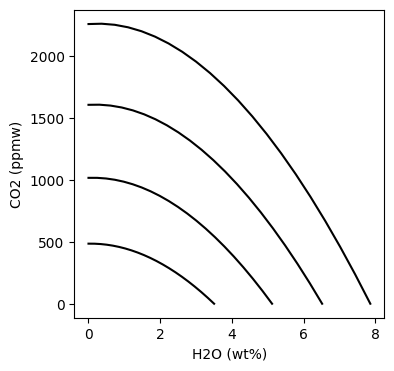

In [11]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4))

data1 = isobar1000
data2 = isobar2000
data3 = isobar3000
data4 = isobar4000

# Plotting results
ax1.plot(data1['H2O_wtpc'], data1['CO2_ppm'], '-k')
ax1.plot(data2['H2O_wtpc'], data2['CO2_ppm'], '-k')
ax1.plot(data3['H2O_wtpc'], data3['CO2_ppm'], '-k')
ax1.plot(data4['H2O_wtpc'], data4['CO2_ppm'], '-k')

ax1.set_ylabel('CO2 (ppmw)')
ax1.set_xlabel('H2O (wt%)')